# Linear regression with regulaizers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
airline_data = pd.read_csv('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/data/airline_costs.txt', delim_whitespace=True, index_col=False, header=None)


airline_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [3]:
airline_data.columns = ['Airline', 'Flight Length', 'Plane Speed','Daily flight time per plane', 'Population Served','TOC','Revenue','Load Factor','Capacity','Total Assets','Funds','Adjusted Assets']


#check by printing the data again
airline_data.head()

,Airline,Flight Length,Plane Speed,Daily flight time per plane,Population Served,TOC,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [4]:
toc = airline_data.pop('TOC')

airline_data.insert(1,'TOC' , toc)

airline_data.head()

,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,116.3,57,133,6.10,20200,0.96,0.400,2.400,21.13,3.21,17.92
1,American,43.0,270,216,6.93,56928,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,141.5,100,140,4.45,183,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,50.6,176,182,6.60,11869,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,51.0,142,167,7.47,41097,2.68,0.510,5.255,195.02,6.06,188.96


Also note that Adjusted Assets column is sufficient for our analysis, since if is obtained as difference of Total Assets and Funds. However for this exercise, we shall 
 remove Total Assets and Funds columns. Instead, we will keep them.

In [5]:
n = len(airline_data.index)
print(n)

31


In [6]:
col = [2,3,4,5,6,7,8,9,10,11]
x_data = airline_data[airline_data.columns[col]].to_numpy()  # convert to numpy array

x_data

array([[5.70000e+01, 1.33000e+02, 6.10000e+00, 2.02000e+04, 9.60000e-01,
        4.00000e-01, 2.40000e+00, 2.11300e+01, 3.21000e+00, 1.79200e+01],
       [2.70000e+02, 2.16000e+02, 6.93000e+00, 5.69280e+04, 3.98000e+00,
        6.89000e-01, 5.77600e+00, 1.43653e+03, 1.65220e+02, 1.27131e+03],
       [1.00000e+02, 1.40000e+02, 4.45000e+00, 1.83000e+02, 7.90000e-01,
        3.58000e-01, 2.20700e+00, 6.65000e+00, 1.00000e-02, 6.64000e+00],
       [1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.60300e+02, 5.81000e+00, 1.54490e+02],
       [1.42000e+02, 1.67000e+02, 7.47000e+00, 4.10970e+04, 2.68000e+00,
        5.10000e-01, 5.25500e+00, 1.95020e+02, 6.06000e+00, 1.88960e+02],
       [5.10000e+01, 1.34000e+02, 4.67000e+00, 1.75700e+03, 3.50000e-01,
        1.67000e-01, 2.09600e+00, 1.40200e+01, 1.00000e-02, 1.40100e+01],
       [1.75000e+02, 1.75000e+02, 8.60000e+00, 1.80000e+04, 2.17000e+00,
        5.58000e-01, 3.88900e+00, 1.14160e+02

In [7]:
# adding col of 1 at last of cols

x_final = np.hstack((x_data , np.ones((x_data.shape[0], 1))))

In [8]:
x_final

array([[5.70000e+01, 1.33000e+02, 6.10000e+00, 2.02000e+04, 9.60000e-01,
        4.00000e-01, 2.40000e+00, 2.11300e+01, 3.21000e+00, 1.79200e+01,
        1.00000e+00],
       [2.70000e+02, 2.16000e+02, 6.93000e+00, 5.69280e+04, 3.98000e+00,
        6.89000e-01, 5.77600e+00, 1.43653e+03, 1.65220e+02, 1.27131e+03,
        1.00000e+00],
       [1.00000e+02, 1.40000e+02, 4.45000e+00, 1.83000e+02, 7.90000e-01,
        3.58000e-01, 2.20700e+00, 6.65000e+00, 1.00000e-02, 6.64000e+00,
        1.00000e+00],
       [1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.60300e+02, 5.81000e+00, 1.54490e+02,
        1.00000e+00],
       [1.42000e+02, 1.67000e+02, 7.47000e+00, 4.10970e+04, 2.68000e+00,
        5.10000e-01, 5.25500e+00, 1.95020e+02, 6.06000e+00, 1.88960e+02,
        1.00000e+00],
       [5.10000e+01, 1.34000e+02, 4.67000e+00, 1.75700e+03, 3.50000e-01,
        1.67000e-01, 2.09600e+00, 1.40200e+01, 1.00000e-02, 1.40100e+01,
        1.0000

In [9]:
x_final.shape

(31, 11)

In [10]:
y_data = airline_data[airline_data.columns[1]].to_numpy()
y_data.shape
y_final = y_data.reshape(31,1)
y_final

array([[116.3],
       [ 43. ],
       [141.5],
       [ 50.6],
       [ 51. ],
       [318.5],
       [ 59.2],
       [ 77. ],
       [ 62.3],
       [ 45.3],
       [ 42.6],
       [112.4],
       [125.2],
       [169.3],
       [ 64.8],
       [100.5],
       [ 42.9],
       [ 81.1],
       [ 56.7],
       [ 75.4],
       [ 71.3],
       [150.1],
       [ 78.9],
       [130.3],
       [ 46.2],
       [ 42.3],
       [103.3],
       [ 44.2],
       [ 64.7],
       [820.9],
       [130.9]])

In [11]:
XTX = np.matmul(np.transpose(x_final),x_final)

print('XTX',XTX.shape)

XTX (11, 11)


In [12]:
XTY = np.matmul(np.transpose(x_final),y_final)

print('XTY', XTY.shape)

XTY (11, 1)


In [13]:
beta = np.matmul(np.linalg.inv(XTX),XTY)

print(beta,beta.shape)

[[-7.58691775e+00]
 [ 8.08639982e+00]
 [-1.32890770e+02]
 [-7.35541680e-03]
 [ 1.23048428e+03]
 [-3.89203536e+03]
 [-2.64885065e+02]
 [ 1.58750000e+01]
 [-1.42500000e+01]
 [-1.63750000e+01]
 [ 1.43301982e+03]] (11, 1)


In [14]:
# lets find out the rank oof the matrix

print(np.linalg.matrix_rank(XTX))

10


In [15]:
XTX_inv = np.linalg.inv(XTX)
is_identity = np.all(np.matmul(XTX,XTX_inv)==np.identity(XTX.shape[0]))
print(is_identity)

False


$\textbf{Note:}$ Though the matrix $X^\top X$ is not full-rank, that is, $10:= \text{rank}(X^\top X)<11$, we see that $\texttt{numpy}$ does not raise any error while computing the inverse of $X^\top X$. Hence we will use $\texttt{scipy}$ to solve for $\beta$ and check if we get any error. 

In [16]:
import scipy.linalg


In [17]:
print(XTX.shape)
print(XTY.shape)

p = scipy.linalg.inv(XTX)
print(p.shape)
z = scipy.linalg.solve(p,XTY)
print(z)

(11, 11)
(11, 1)
(11, 11)
[[-1.12499459e+15]
 [-3.62139026e+14]
 [-6.20296441e+12]
 [-2.96414366e+17]
 [-1.66034446e+13]
 [-1.27545568e+12]
 [-2.11557479e+13]
 [-9.19664667e+15]
 [-1.12342120e+15]
 [-8.07322547e+15]
 [-5.03678391e+08]]


C:\Users\sumit\AppData\Local\Temp/ipykernel_2148/3304576416.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.09852e-20): result may not be accurate.
  z = scipy.linalg.solve(p,XTY)


In [18]:
beta = scipy.linalg.solve(XTX,XTY)

print('beta from scipy', beta)

beta from scipy [[ 7.52395660e-01]
 [-2.25317845e+00]
 [ 3.31746733e+00]
 [ 3.10628655e-03]
 [ 7.23197186e+02]
 [-2.17522853e+03]
 [-3.82138951e+02]
 [ 1.59128832e+01]
 [-1.44753368e+01]
 [-1.64360893e+01]
 [ 1.43301982e+03]]


C:\Users\sumit\AppData\Local\Temp/ipykernel_2148/3016277171.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=7.39613e-21): result may not be accurate.
  beta = scipy.linalg.solve(XTX,XTY)


$\textbf{Note:}$ $\texttt{scipy}$ gives a warning that the matrix $X^\top X$ is ill-conditioned. 

We can use the condition number of a matrix $A$ to identify if the matrix is ill-conditioned or not. 

Suppose we solve a system $Ax=b$, then the condition number of $A$ denotes the amount of error that can be incurred in the decision variable $x$ when there is a small error in $b$. 

For a symmetric matrix $A \in {\mathbb{R}}^{n \times n}$, we can compute the condition number of $A$ denoted by $\kappa(A)$ as:

$\begin{align}
\kappa(A) = \frac{\max_{i \in \{1,2,\ldots,n\}} |\lambda_i(A)|}{\min_{i \in \{1,2,\ldots,n\}} |\lambda_{i}(A)|}
\end{align}
$

where $\lambda_i(A)$ denotes $i$-th eigen value of $A$, $\max_i |\lambda_i(A)|$ and $\min_i |\lambda_i(A)|$ denote respectively  the maximum and minimum absolute eigen values of $A$.



For a general matrix $A \in {\mathbb{R}}^{m \times n}$, we can compute the condition number of $A$ denoted by $\kappa(A)$ as:

$\begin{align}
\kappa(A) = \frac{\sigma_{\max}(A)}{\sigma_{\min}(A)}
\end{align}
$

where $\sigma_{\max}(A)$ and $\sigma_{\min}(A)$ are maximum and minimum singular values of $A$ given by $\sigma_{\max}(A) = \sqrt{\lambda_{\max}(A^\top A)}$ and $\sigma_{\min}(A) = \sqrt{\lambda_{\min}(A^\top A)}$, where $\lambda_{\max}(A^\top A)$, $\lambda_{\min}(A^\top A)$ denote the maximum and minimum eigen values of $A^\top A$.



If the condition number $\kappa(A)$ is a $\textbf{large number}$ then the error incurred in $x$ would be large and hence the matrix $A$ is called $\textbf{ill-conditioned}$. 


#Conditioning and impact of small variations in output

In fact, when we solve a system of linear equations $A\mathbf{x} = \mathbf{b}$, assuming $A$ to be positive definite (hence invertible), we can obtain the solution to the system as $\mathbf{x} = A^{-1} \mathbf{b}$. 

Now if the output $\mathbf{b}$ is perturbed to $\mathbf{b}+\Delta \mathbf{b}$, and the corresponding change in the variable $\mathbf{x}$ is given by $\mathbf{x}+\Delta \mathbf{x}$, then we can write: $A(\mathbf{x}+\Delta \mathbf{x}) = \mathbf{b}+\Delta \mathbf{b}$. 

Hence $\mathbf{x}+\Delta \mathbf{x} = A^{-1} (\mathbf{b}+\Delta \mathbf{b}) = \mathbf{x} + A^{-1}\Delta \mathbf{b}$. Thus the change in solution $\mathbf{x}$ can be represented as $\Delta \mathbf{x} = A^{-1}\Delta \mathbf{b}$. 

Further it can be shown that the relative change in solution is related to the relative change in output as: 

$
\begin{align}
\frac{\|\Delta \mathbf{x}\|}{\|\mathbf{x}\|} = \kappa(A) \frac{\|\Delta \mathbf{b}\|}{\|\mathbf{b}\|}. 
\end{align}
$

Hence if the condition number $\kappa(A)$ is large, we can see that even minor relative perturbations in output $\mathbf{b}$ cause significantly large relative changes in the corresponding solutions.

In [19]:
# condition number
print(np.linalg.cond(XTX))

7.974416824913858e+19


We can see that the ill-conditioning of $X^\top X$ might lead to wild changes in solutions of linear regression parameters, even for small changes in the output $\mathbf{y}$. 

An extreme case of ill-conditioning of $X^\top X$ occurs when $X^\top X$ becomes non-invertible. 

Recall that $X$ is a $n \times (d+1)$ matrix. When the columns of $X$ are not linearly independent (i.e. one column of $X$ can be represented as a linear combination of some subset of other columns), then $X$ does not have full column rank and hence $X^\top X$ becomes non-invertible. 

In such cases, the condition number of $X^\top X$ becomes very large ($\approx \infty$), and hence any solution that is obtained is quite sensitive to small changes in the output.  

## *adding l2 regularization to improve the conditioning of the matrix*

We shall motivate the use of $\ell_2$ regularizer to improve the conditioning of the matrix. 

Instead of minimizing the original OLS objective 
$
\begin{align}
L_{OLS}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

we shall now minimize the OLS objective added with a scaled $\ell_2$ regularizer. 

The $\ell_2$ regularizer in $\beta \in {\mathbb{R}}^{d+1}$ is defined as the squared $\ell_2$ norm of $\beta$: 

$
\begin{align}
\|\beta\|_2^2 = \sum_{i=1}^{d+1} \beta_i^2.  
\end{align}
$

Hence we shall now solve: 
$
\begin{align}
L_{\text{ridge}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \lambda \sum_{i=1}^{d+1} \beta_i^2. 
\end{align}
$ 

The above objective function is called $\textbf{ridge}$ regression objective. $\lambda>0$ is a regularization hyperparameter. 



Now we can write the objective function as:

$
L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2.
$

To solve 

$
\min_\beta L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L_{\text{ridge}}(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta + \lambda I\beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X}+\lambda I)^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is always valid since $(\mathbf{X}^\top\mathbf{X}+\lambda I)$ is invertible.  


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100\}$ let us check the condition number of $(X^\top X+\lambda I)$. 

In [20]:
reg_hyperparameter = np.array([1e-5,1e-3,1e-2,1e-1,1,10,100])

I = np.identity(XTX.shape[0])

for i in reg_hyperparameter:
    print('reg_hyperparameter', i)
    print('condition number of (XTX-⁁I) -> ',np.linalg.cond(XTX+i*I) )

reg_hyperparameter 1e-05
condition number of (XTX-⁁I) ->  1501310343298227.2
reg_hyperparameter 0.001
condition number of (XTX-⁁I) ->  15012670755407.81
reg_hyperparameter 0.01
condition number of (XTX-⁁I) ->  1501267288966.8928
reg_hyperparameter 0.1
condition number of (XTX-⁁I) ->  150126721047.6939
reg_hyperparameter 1.0
condition number of (XTX-⁁I) ->  15012672103.805637
reg_hyperparameter 10.0
condition number of (XTX-⁁I) ->  1501267211.082496
reg_hyperparameter 100.0
condition number of (XTX-⁁I) ->  150126722.00538412


In [21]:
import scipy.linalg

betas= []

for i in reg_hyperparameter:
    beta = scipy.linalg.solve(XTX+i*I, XTY)
    print('reg_hyperparameter', i)
    print('beta',beta)
    print('********$$$$*******')
    betas.append(beta)


reg_hyperparameter 1e-05
beta [[ 7.52538381e-01]
 [-2.25222818e+00]
 [ 3.30238546e+00]
 [ 3.10642807e-03]
 [ 7.22976204e+02]
 [-2.17465207e+03]
 [-3.82040729e+02]
 [ 3.04836656e-01]
 [ 1.13264604e+00]
 [-8.27984059e-01]
 [ 1.43271639e+03]]
********$$$$*******
reg_hyperparameter 0.001
beta [[ 7.66223755e-01]
 [-2.16014295e+00]
 [ 1.84741577e+00]
 [ 3.12018008e-03]
 [ 7.01649939e+02]
 [-2.11902946e+03]
 [-3.72563812e+02]
 [ 3.04604033e-01]
 [ 1.12668212e+00]
 [-8.22073987e-01]
 [ 1.40339039e+03]]
********$$$$*******
reg_hyperparameter 0.01
beta [[ 8.58860080e-01]
 [-1.46856675e+00]
 [-8.62792126e+00]
 [ 3.22604166e-03]
 [ 5.47573013e+02]
 [-1.71783994e+03]
 [-3.04249073e+02]
 [ 3.02345821e-01]
 [ 1.08073319e+00]
 [-7.78387340e-01]
 [ 1.18855672e+03]]
********$$$$*******
reg_hyperparameter 0.1
beta [[ 9.69096121e-01]
 [ 1.06214566e+00]
 [-3.77107029e+01]
 [ 3.64746664e-03]
 [ 1.11307749e+02]
 [-5.89083650e+02]
 [-1.13855402e+02]
 [ 2.74163395e-01]
 [ 8.96850101e-01]
 [-6.22686686e-01]
 [ 

$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

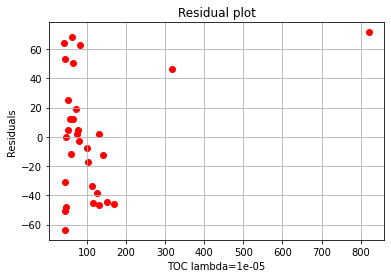

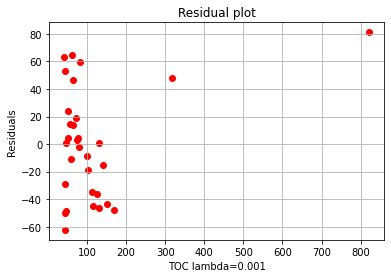

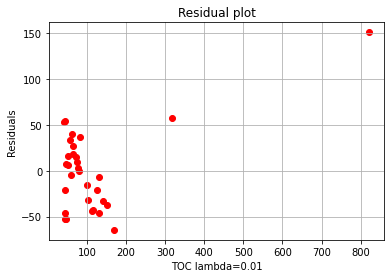

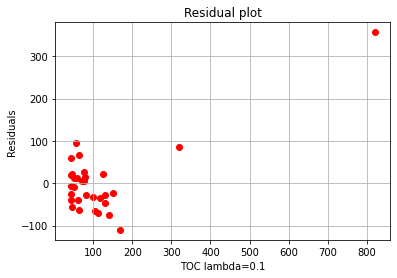

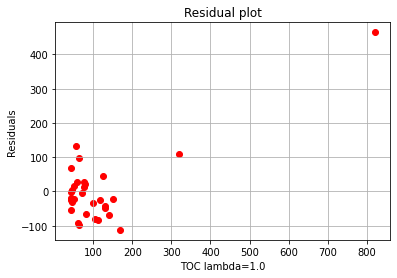

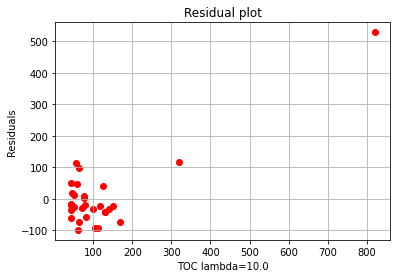

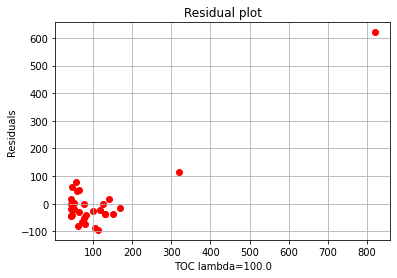

In [37]:
beta_idx = 0

for i in reg_hyperparameter:
    beta = betas[beta_idx]
    beta_idx +=1
    
    xlabel = 'TOC lambda='+str(i)
    e_i_residuls = []

    for i in range(n):
        x_i = x_final[i,:]
        y_i = y_final[i]

        y_pred_i = np.dot(x_i,beta)
        e_i = y_i - y_pred_i

        e_i_residuls.append(e_i)
    
    plt.scatter(airline_data['TOC'], e_i_residuls, color='r')
    plt.title("Residual plot")
    plt.xlabel(xlabel)
    plt.ylabel("Residuals")
    plt.grid()
    plt.show()
     



$\Large{\text{Coefficient of multiple determination for high dimensions}}$ 

Note that the description of coefficient of multiple determination for high dimensions is essentially the same as that for single dimension case. 

Consider the term 

$
\begin{align}
\Sigma_{YY} = \sum_{i=1}^{n} (y^i - \bar{y})^2. 
\end{align}
$
This term $\Sigma_{YY}$ measures the $\textbf{observed total variation of the response}$, without considering the effect of predictor variables. 

When we have access to a predictor variable, then the $\textbf{unexplained variation of response variable given the predictor variable}$ is given by the sum of squared residuals:

$
\begin{align}
L = \sum_{i=1}^{n} (e^i)^2. 
\end{align}
$

Define the term:

$
\begin{align}
\text{SSD} = \Sigma_{YY}- L
\end{align}
$

as the difference between observed total variation of the response and the unexplained variation given the predictor. Hence this can be considered as $\textbf{variability explained by the regression on the predictor variable}$. 

Assuming $\Sigma_{YY}\neq 0$, consider: 

$
\begin{align}
\frac{\text{SSD}}{\Sigma_{YY}} = 1- \frac{L}{\Sigma_{YY}}.
\end{align}
$
Here the term $\frac{\text{SSD}}{\Sigma_{YY}}$ denotes the proportion of observed variability in the response variable which is explained by the regression on the predictor variable. From the equality, this proportion of observed variability given the predictor is simply $1$ minus the proportion of unexplained variability. 

This term $\frac{\text{SSD}}{\Sigma_{YY}}$ denoting the proportion of observed variability which is explained by the predictor variable has a special name called $\textbf{coefficient of multiple determination}$ and is denoted by $R^2$. 

It is known that $0\leq R^2 \leq 1$. 

In [22]:
y_bar = 0  # computation of the y_bar

for i in range(n):
    y_i = float(airline_data.iat[i,1])
    y_bar += y_i

y_bar /= n
print('Y_bay', y_bar)


Y_bay 113.50645161290323


In [23]:
# computation of the sigma_yy

sigma_yy=0

for i in range(n):
    y_i = float(airline_data.iat[i,1])
    sigma_yy += (y_i - y_bar)**2

print('sigma_yy', sigma_yy)

sigma_yy 610938.3987096774


In [26]:
beta_idx = 0

for i in reg_hyperparameter:
    beta = betas[beta_idx]
    beta_idx+=1

    sum_sq_residual = 0

    for k in range(n):
        x_i = x_final[k,:]
        y_i = y_final[k]

        y_pred_i = np.dot(x_i, beta)
        e_i = y_i - y_pred_i

        sum_sq_residual += (e_i)**2

    print('lambda', i)
    print('sum of suared residual', sum_sq_residual)

    score = 1 - (sum_sq_residual/sigma_yy)

    print('score',  score)

    print('**********************')


lambda 1e-05
sum of suared residual [48091.04515483]
score [0.92128332]
**********************
lambda 0.001
sum of suared residual [48270.38435013]
score [0.92098977]
**********************
lambda 0.01
sum of suared residual [60051.44363136]
score [0.90170622]
**********************
lambda 0.1
sum of suared residual [198507.15296848]
score [0.67507828]
**********************
lambda 1.0
sum of suared residual [330055.62735503]
score [0.45975629]
**********************
lambda 10.0
sum of suared residual [379056.04870797]
score [0.37955111]
**********************
lambda 100.0
sum of suared residual [463653.0991366]
score [0.24108044]
**********************


As we can see, increasing the value of $\lambda$ leads to lower $R^2$ values which indicates that the unexplained variations captured by the regression parameters is not significant when compared to the variations captured by the mean $\bar{\mathbf{y}}$. 

Also note that increasing $\lambda$ leads to residual plots where the variance in the predicted values become smaller and smaller when compared to lower values of $\lambda$. However it might turn out that on an average, the estimated parameters might be away from the actual parameters which were possibly responsible for the data. This leads to a larger bias in the estimated model parameters. This phenomenon is one explanation for the popular $\textbf{bias-variance}$ tradeoff.

# *Adding L1 regularization to find sparse solutions*

Instead of $\ell_2$ regularizer, we can use $\ell_1$ regularizer of the parameters $\beta$. $\ell_1$ regularizer is useful to obtain sparse solutions, where most of the components of $\beta$ are zero and only a few weights are non-zero. 

The $\ell_1$ regularizer with $\beta$ is given as the $\ell_1$ norm of $\beta$:

$
\begin{align}
\|\beta\|_1 = \sum_{i=1}^{d+1} |\beta_i|.
\end{align}
$

Recall the original OLS objective: 
$
\begin{align}
L_{OLS}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

and the objective for ridge regression where we minimize the OLS objective added with a scaled $\ell_2$ regularizer: 

$
\begin{align}
L_{\text{ridge}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \lambda \sum_{i=1}^{d+1} \beta_i^2. 
\end{align}
$ 

Similar to ridge regression, we can use the scaled $\ell_1$ regularizer along with the OLS objective to get the following objective: 

$
\begin{align}
L_{\text{lasso}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \alpha \sum_{i=1}^{d+1} |\beta_i|. 
\end{align}
$ 

The above objective function is called $\textbf{lasso}$ regression objective. $\alpha>0$ is a regularization hyperparameter. 

Unlike ridge regression, lasso cannot be solved by a simple differentiation type idea. 

Instead we need to use an iterative algorithm to solve the lasso optimization problem. 


In [27]:
from sklearn import linear_model
from sklearn.metrics import r2_score

alphas = np.array([1e-5, 1e-4, 1e-3,1e-2,0.1,1,10,100])

for alpha_ in alphas:

    clf = linear_model.Lasso(alpha=alpha_, max_iter=100000)
    clf.fit(x_final,y_final)

    print('alpha', alpha_)
    print(clf.coef_)
    print(clf.intercept_)

    y_pred = clf.predict(x_final)
    R2 = r2_score(y_final, y_pred)
    print('R2 score', R2)

    print('******************')

c:\Users\sumit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.299e+02, tolerance: 6.109e+01
  model = cd_fast.enet_coordinate_descent(


alpha 1e-05
[ 7.52401775e-01 -2.25317646e+00  3.31721242e+00  3.10628549e-03
  7.23193567e+02 -2.17521925e+03 -3.82137254e+02 -2.78886609e-01
  1.71643369e+00 -2.44318836e-01  0.00000000e+00]
[1433.01645838]
R2 score 0.92128334639926
******************


c:\Users\sumit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.308e+02, tolerance: 6.109e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sumit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.397e+02, tolerance: 6.109e+01
  model = cd_fast.enet_coordinate_descent(


alpha 0.0001
[ 7.52456817e-01 -2.25315853e+00  3.31491825e+00  3.10627593e-03
  7.23160998e+02 -2.17513575e+03 -3.82121985e+02 -2.78816556e-01
  1.71636988e+00 -2.44382341e-01  0.00000000e+00]
[1432.9861773]
R2 score 0.9212833456535764
******************
alpha 0.001
[ 7.53007233e-01 -2.25297921e+00  3.29197652e+00  3.10618035e-03
  7.22835308e+02 -2.17430073e+03 -3.81969290e+02 -2.78116027e-01
  1.71573174e+00 -2.45017392e-01  0.00000000e+00]
[1432.68336649]
R2 score 0.9212832710852408
******************


c:\Users\sumit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.290e+02, tolerance: 6.109e+01
  model = cd_fast.enet_coordinate_descent(


alpha 0.01
[ 7.58511392e-01 -2.25118599e+00  3.06255921e+00  3.10522453e-03
  7.19578406e+02 -2.16595052e+03 -3.80442344e+02 -2.71110737e-01
  1.70935036e+00 -2.51367904e-01  0.00000000e+00]
[1429.65525834]
R2 score 0.9212758142516363
******************
alpha 0.1
[ 8.13552981e-01 -2.23325387e+00  7.68386149e-01  3.09566627e-03
  6.87009388e+02 -2.08244846e+03 -3.65172884e+02 -2.01057840e-01
  1.64553651e+00 -3.14873020e-01  0.00000000e+00]
[1399.37417686]
R2 score 0.9205301308911746
******************
alpha 1.0
[ 1.33203160e+00 -2.10277243e+00 -1.93345383e+01  2.92881337e-03
  3.71126241e+02 -1.28114129e+03 -2.17165267e+02 -0.00000000e+00
  1.43815928e+00 -4.36373247e-01  0.00000000e+00]
[1104.46533157]
R2 score 0.8508469702130268
******************
alpha 10.0
[ 8.82426626e-01 -3.03164456e+00 -4.68105718e+01  1.72330050e-04
 -0.00000000e+00 -0.00000000e+00 -2.23593400e+00 -0.00000000e+00
  1.11505802e+00 -1.67225015e-01  0.00000000e+00]
[805.86775277]
R2 score 0.502977069366046
*******

c:\Users\sumit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+03, tolerance: 6.109e+01
  model = cd_fast.enet_coordinate_descent(
